In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# load the dataset

In [77]:
df=pd.read_csv("NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [79]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [80]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [81]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


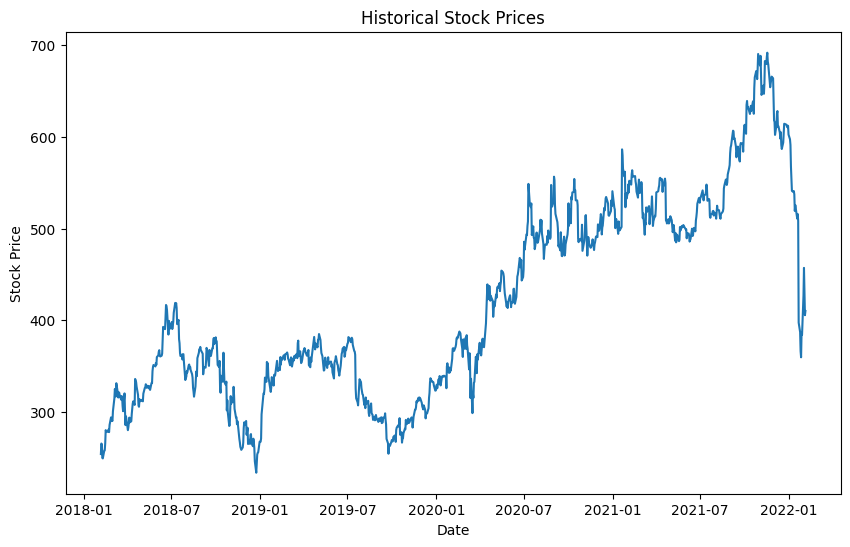

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Historical Stock Prices')
plt.show()

# data preprocessing

In [83]:
data=pd.read_csv("NFLX.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [85]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [125]:
train = data.loc['2018-02-05':'2021-12-31']
test = data.loc['2022-01-01':'2022-01-31']

In [126]:
x_train = train.drop(columns = ['Open'])
y_train = train['Open']
x_test = test.drop(columns = ['Open'])
y_test = test['Open']

In [127]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(985, 5)
(985,)
(20, 5)
(20,)


# random frorestregressor

In [ ]:
# data set is supervised meachine learing 
#time series analyse to precdict feture stock predction

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
rf = RandomForestRegressor(max_depth=20, random_state = 42,n_estimators=150)

In [130]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

In [131]:
rf_train_score = rf.score(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9996830741916087
0.9918135946459509


In [132]:
pred = rf.predict(x_test)
train_pred = rf.predict(x_train)
print(pred)
print(train_pred)

[597.30273603 589.91972897 582.54152261 550.31132694 547.06786271
 534.81113649 535.57940352 537.92739461 536.40920329 523.53573617
 517.60020737 516.40087275 517.84153165 394.63640122 363.95500155
 374.10893036 371.72819589 383.98126286 376.37673517 410.67680239]
[261.86386631 250.41073105 267.42679148 264.23572515 251.59580389
 254.73940055 258.28766951 262.36666743 269.21946551 277.29107512
 279.43672878 282.56773682 282.78327093 281.32433323 289.31219905
 294.44565959 293.47893583 290.73893428 290.67626309 304.43593759
 320.70080185 319.81266804 320.70487493 322.39539333 331.41619937
 321.97753003 320.1400721  322.01987659 321.69394454 313.867259
 314.07153823 316.44420549 312.69120375 306.96900395 309.61405815
 316.54239509 295.79314397 286.84360103 290.22413589 286.35387542
 276.64753829 293.95512824 291.27567135 292.6511918  296.83839395
 303.88487086 309.88893295 315.91700488 314.29606228 329.74400335
 336.00692641 332.82233773 332.78159998 327.33246303 316.45220094
 305.068529

In [133]:
prediction_df = x_test
prediction_df['Open'] = y_test
prediction_df['Predicted Price'] = pred
prediction_df.head()

,High,Low,Close,Adj Close,Volume,Open,Predicted Price
Date,,,,,,,
2022-01-03,609.989990,590.559998,597.369995,597.369995,3067500,605.609985,597.302736
2022-01-04,600.409973,581.599976,591.150024,591.150024,4393100,599.909973,589.919729
2022-01-05,592.840027,566.880005,567.520020,567.520020,4148700,592.000000,582.541523
2022-01-06,563.359985,542.010010,553.289978,553.289978,5711800,554.340027,550.311327
2022-01-07,553.429993,538.219971,541.059998,541.059998,3381700,549.460022,547.067863


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


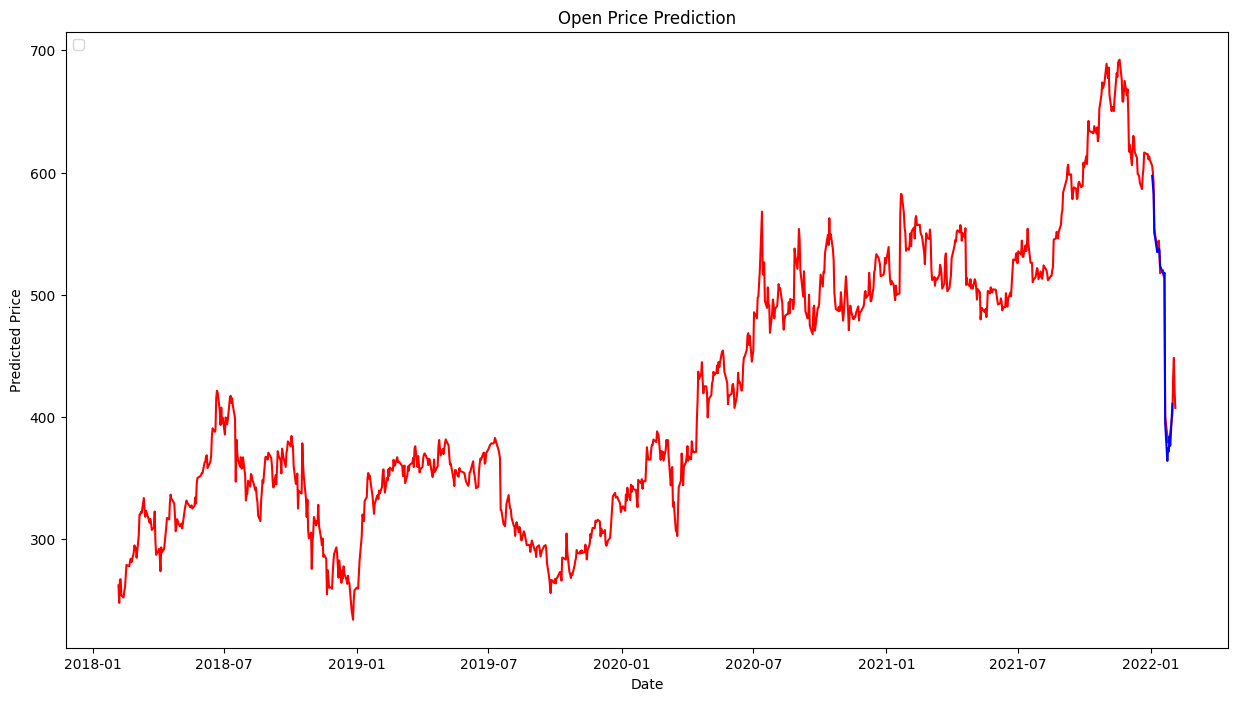

In [143]:
plt.subplots(figsize=(15, 8))
plt.title("Open Price Prediction")
plt.plot(data['Open'], color='red', linestyle='solid')
plt.plot(prediction_df['Predicted Price'], color='blue', linestyle='solid')
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend(loc="upper left")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


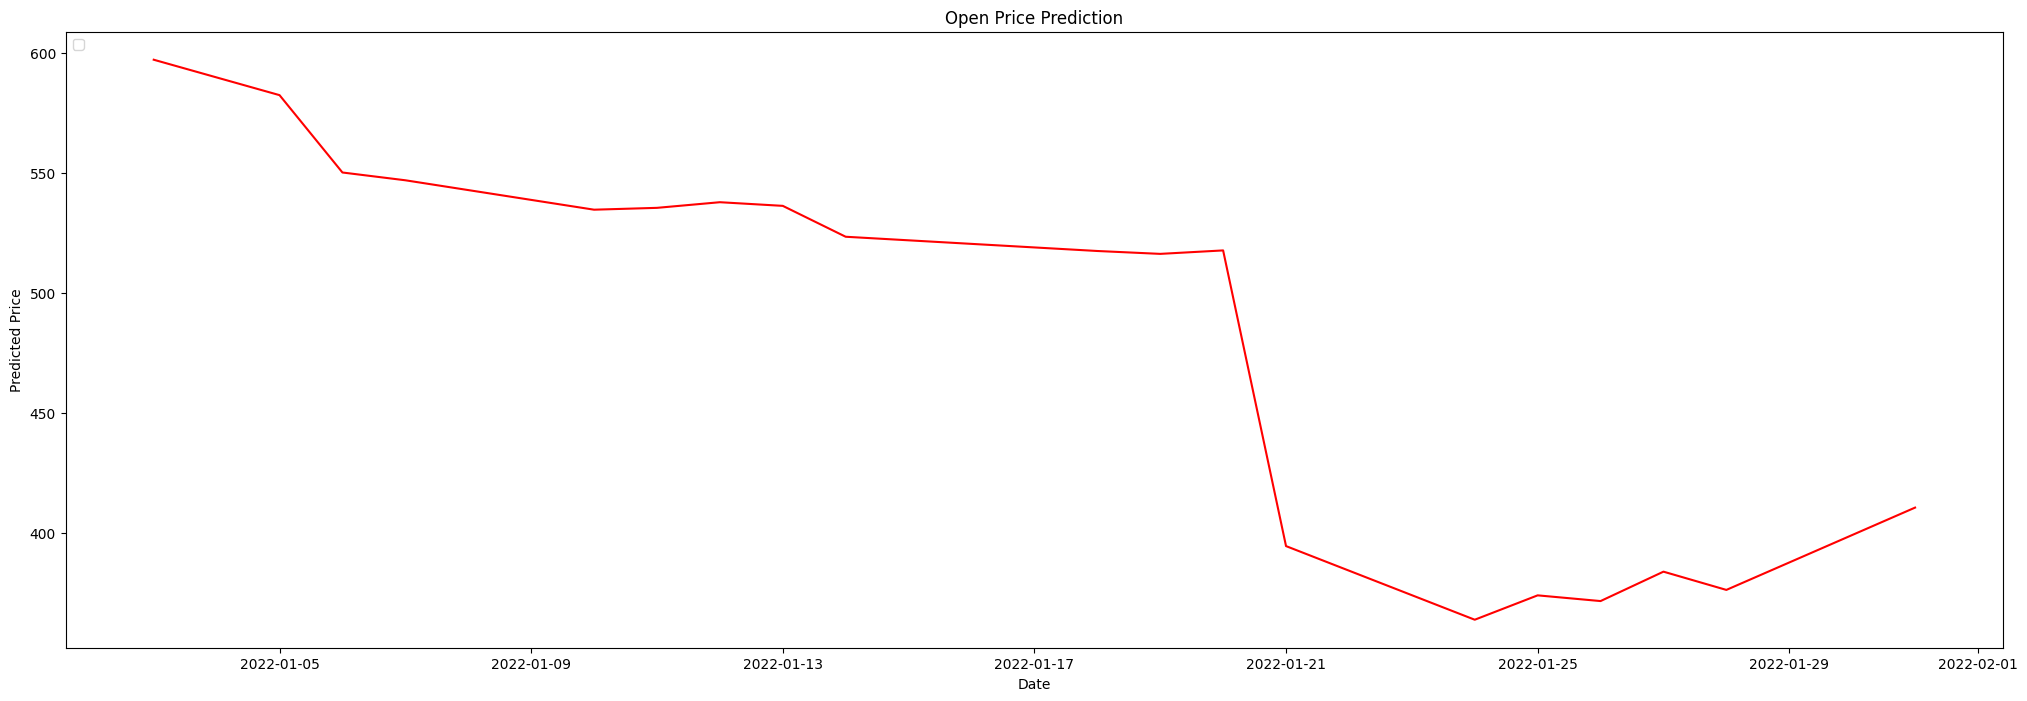

In [135]:
plt.subplots(figsize=(25, 8))
plt.title("Open Price Prediction")
plt.plot(prediction_df['Predicted Price'], color='red', linestyle='solid')
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#differnence between open and prediction

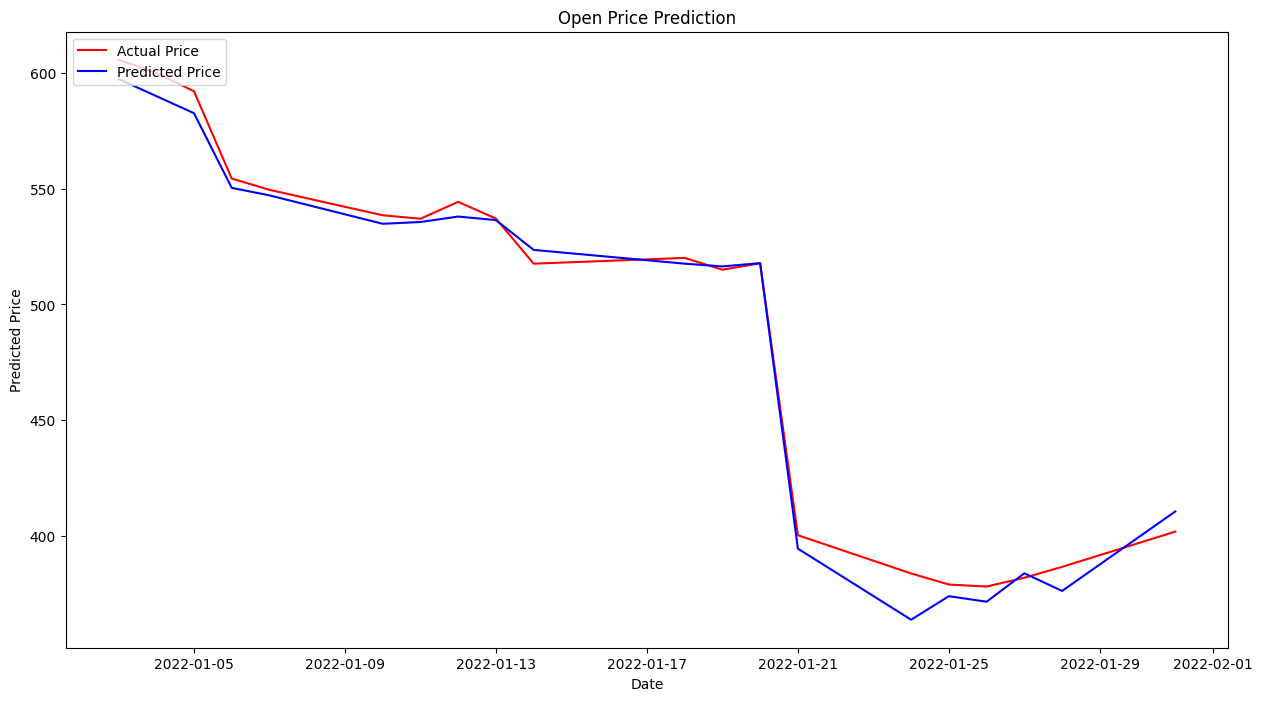

In [142]:
plt.subplots(figsize=(15, 8))
plt.title("Open Price Prediction")
plt.plot(prediction_df['Open'], color='red', linestyle='solid',  label = 'Actual Price')
plt.plot(prediction_df['Predicted Price'], color='blue', linestyle='solid', label = 'Predicted Price')
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend(loc="upper left")
plt.show()

In [137]:
from sklearn import metrics

In [140]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, pred), 4))
errors = abs(pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 5.725
Mean Squared Error: 53.3474
Root Mean Squared Error: 7.3039
(R^2) Score: 0.9918
Accuracy: 98.75 %.
